# Neural Network Fundamentals


- guide to help build a neural network from the very basics
- introduction to the concept of a neural networks and its early development
- introduction on how to build neural networks in Keras
- instructions on how to deploy the model via an API to make it accessible to anyone interested on it







As the name tells, the idea of neural networks is inspired by how neurons work in the human brain. It is, however, crucial for the readers to know that despite the original motivation of neural networks, the NN models being used today have little resemblance to what a human brain does. In its basic form, neural networks are composed of nodes interconnected to each other in several layers. The basic form of a NN would include an input, a hidden and an output layer. The number of nodes and layers can add to the complexity and efficiency of neural networks.
Nowadays, neural nets are used in a variety of applications to tackle problems such as classification, speech and image recognition, control systems and predictions.
In what follows, the you will find an easy step-by-step guide on how to implement all these processes from scratch, the coding part of which draws inspiration from the works of [Nielsen, 2017](http://neuralnetworksanddeeplearning.com/index.html), [Dima, 2016](https://www.cristiandima.com/neural-networks-from-scratch-in-python/).

---






## History

The McCulloch-Pitts model of neuron in 1943 was one of the earliest simplified version of neural networks. It consisted of a simple neuron which received a weighted sum of inputs and output either zero if the sum was smaller than a threshold or one when it was greater than the threshold. This idea is called firing and is an interesting analogy to what an actual neuron does. Later on, in the early 1960s, Rosenblatt introduced the simple perceptron model. This was a developed version of the McCulloch-Pitts with an input and output layer. However, the linear separablilty limitation of simple perceptron took away the research interest in neural networks for a while. In the early 1980s, the Hopfield model of content-addressable memory, however, motivated researchers in the area again and later on with the introduction of backpropagation learning algorithm, interest in neural networks research soared. 

# NN from scratch


The best way to understand how neural networks work is to build one yourself from scratch. The understanding becomes even more comprehensive if there is a particular problem that can be solved using NNs. Therefore let’s start our work by taking a look at the picture below.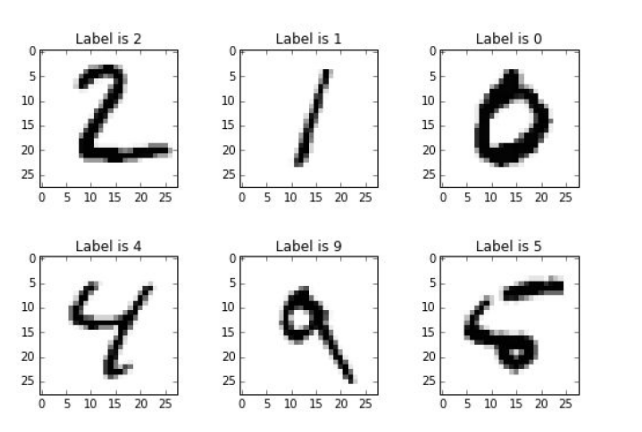

There are handwritten numbers that you want computer to correctly classify. This would be an easy task for a person but at least for a long period of time was an extremely complicated one for a machine.

Even though the computer is faster than the human brain in numeric computations, the brain outperforms the computer in some other tasks. Many of those tasks are related to the human ability for sentience (which is a concept different from intelligence). The trick is to find a way, so that the computer could apply its numeric computation skills to solve these later tasks (at least to some degree).

The first step would be to limit the scope of the task. In our particular case the broad task of image recognition will be addressed as a classification problem - a task of giving an object a label from a given set of labels.

As we will see during the process of building our own NN, its output is based almost exclusively on application of linear algebra methods. Despite the name (which is sometimes related to the fear of artificial intelligence), neural networks in fact are much more related to statistical methods (like regression analysis or curve fitting) than to the way human brain works [Stuart Reid, 2014].

NNs are inspired by human brain only to certain extent. For instance the main element that makes them similar is a multilayer net structure of simple elements that are connected in some way, receiving and transmitting information. But the structure of the human brain is much more complicated, besides it is self-organizing and adaptive in contrast to the fixed manually designed architecture of a NN. Hence, there is a good reason to stop being afraid of neural networks and instead to create one ourselves.

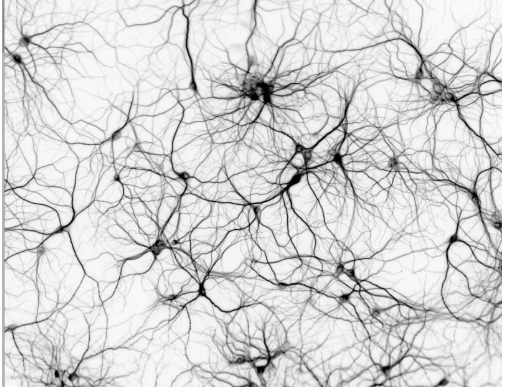

## Schematic Representation

A complex multilayer structure that all neural networks have in common in a simplified way can be depicted using the following picture.
[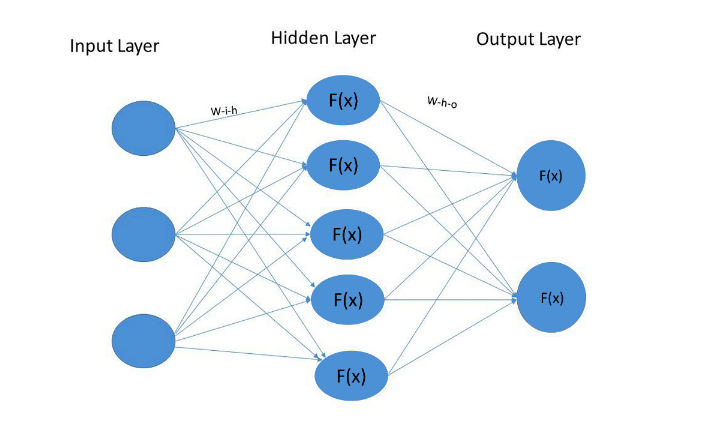



All we need in order to implement such a structure is base Python and numpy, a library for numerical computation, which we will be using to do linear algebra.

First let’s determine the elements of a neural network depicted above: nodes, layers, weights across nodes and activation functions.

**Nodes**. A node is basically a point where data points are received, processed and then transferred to the node. A node could be either an endpoint or a redistribution point or even both when iterations are done through the learning algorithm. The number of nodes to use is optional.

**Layers**. A layer consists of one or several nodes. The initial layer in the network is called the input layer and it is the entry point through which the data is fed into the neural net. The middle layers are called hidden layer because the computation results of them are not directly visible to someone interacting with the neural net. In the hidden layers, which can range from one to thousands, the features are transformed and most of the structure (both linear and nonlinear) is captured. Finally, there is the final layer, from which results are output. The nodes in each layer are fully interconnected to the ones in the next and the previous layers.

In our case we have a structure with 3 layers: input, output and one hidden layer. The number of nodes in the input (“i_n”), hidden (“h_n”) and output (“o_n”) layers are 3, 5 and 2 respectively. In Python, such a structure can be represented in the following way:

In [ ]:
# Load the package to work with numbers:
import numpy as np

# Determine the structure of the NN:
i_n = 3
h_n = 5
o_n = 2

**Weights**. In order to transfer an input data point to the next layer, a predetermined number (called weight) is stored in each connection from the sender node to the receiver node. Each weight accounts for the impact between the interconnected nodes.

Initially, we assign weights between nodes in neighboring layers randomly. This is needed only for the sake of initializing the structure. Later these weights will be changed in order to solve our classification problem. The weight updating will be better described in the following sections.

Neural nets will have n-1 matrices of weights, where n is the number of layers in the NN. You can imagine these weight matrices sitting between two layers representing the strength of the connection between every single node of neighbouring layers. Thus, each of these matrices will be of size f x p, where p is the number of nodes in the preceding layer and f is the number of nodes in the following layer.

This becomes more clear once you check the code below that creates 2 matrices of weights:

- matrix of weights between input and hidden layers (“w_i_h”) - 5 by 3 matrix
- matrix of weights between hidden and output layers (“w_h_o”) - 2 by 5 matrix.
Such a dimensions of matrices are necessary in order to accomplish matrix and vector multiplications that are done in the following stages.

In [ ]:
# Randomly define the weights between the layers:
w_i_h = np.random.rand(h_n, i_n) # create an array of the given shape and populate it with random values.
w_h_o = np.random.rand(o_n, h_n) #create random values in a given shape.

# Show matrices of randomly assigned weights:
w_i_h
# w_h_o # uncomment this line in order to see the values for w_h_o.
# Use Cmd + / in MacOS and CTRL + / in MS Windows as a shortcut to comment/uncomment lines.

array([[0.79591067, 0.54256044, 0.97348277],
       [0.24899561, 0.8303661 , 0.85339794],
       [0.60601119, 0.03536038, 0.98315094],
       [0.56818922, 0.3752607 , 0.53619881],
       [0.20990623, 0.77472323, 0.680958  ]])

**Activation Function.** The remaining element of the NN’s structure is an activation function - a function which transforms an input data point that it receives from the previous nodes to an output value which will be the input for the nodes in the next layer. The activation function plays an important role in the efficiency of the neural network as it accounts for non-linearity of data. It is to certain extent inspired by the concept of “firing”, which means that neurons “fire” or transmit information further. The simplest activation function can be represented by a step function as on the picture below. 

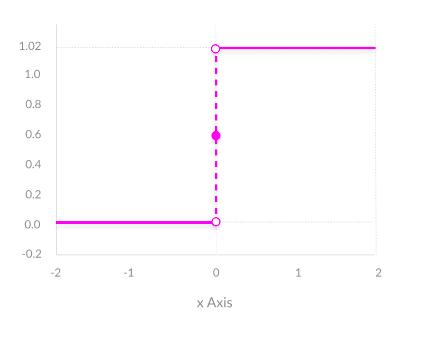


This binary step function is a threshold-based activation function. If the input value is above or below a certain threshold, the neuron is activated and sends exactly the same signal to the next layer.The problem with a step function is that it does not allow multi-value outputs—for example, it cannot support classifying the inputs into one of several categories.



In our NN, we will use a slightly more elaborate activation function, the sigmoid function (logistic), which allows for more efficient use of the input data. Extended description of various activation functions, their benefits and disadvantages is given in sections below.

In [ ]:
# Determine activation function:
def sigmoid(x):
    # np.exp() calculates the exponential
    # of all elements in the input array.
    return 1 / (1 + np.exp(-x))

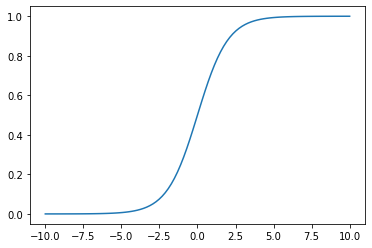

In [ ]:
# Draw activation function:
import matplotlib.pyplot as plt

# return 100 evenly spaced numbers over an interval from -10 to 10.
x = np.linspace(-10, 10, 100)
# plot sigmoid function for sampled values:
plt.plot(x, sigmoid(x))
plt.show()

## Data Inspection


By now we have collected all the elements of the NN. Can we use this structure in order to solve the classification problem stated in the beginning? In order to answer this question we need first to get a better understanding of the data at our disposal.

We are trying to check whether NN is able to solve the classification problem using a collection of 70 000 handwritten numbers. Each of this handwritten number is represented as 28x28 image.

The original source of the data is “THE MNIST DATABASE”. A detailed description of the dataset is available at http://yann.lecun.com/exdb/mnist/. There you can also find, for example, a summary of the performance results achieved by various classification algorithms.

For the sake of simplicity we suggest obtaining the data from another source: https://pjreddie.com/projects/mnist-in-csv/. Here the original images are saved in CSV, which allows to work with them directly.


For the purposes of demonstration below we use a smaller dataset (100 images), which will be expanded at a later stage.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/WCS/"

In [ ]:
import pandas as pd
train_data = pd.read_csv(path+'mnist_train_100.csv', header = None)
#train_data.iloc[0]
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Load the data:
raw_data = open(path + "mnist_train_100.csv", 'r') # "r" stands for "read only" mode.
data = raw_data.readlines() # read all the lines of a file in a list.
raw_data.close() # remove temporal file from the environment in order to save memory.

In [ ]:
type(data)

list

In [ ]:
# Inspect the data - check the number of observations:
len(data) # length of the object.

100

In [ ]:
# Inspect a particular observation of the data:
data[0] # show observation number 0 from the list (remember that in Python numbering starts from 0).


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

- A particular observation looks like a string of 785 elements (label of the 
image + 784 elements for each pixels of a 28x28 image).
- Each element representing a pixel is a number from 0 to 255 (from white to black color).
- The first element in the line is the label of the image and therefore is a number from 0 to 9.

Using matplotlib, we can also reconstruct the original image based on the data about each pixel in the string.


In [ ]:
# Load the package to plot the data:
import matplotlib.pyplot as mpp
%matplotlib inline

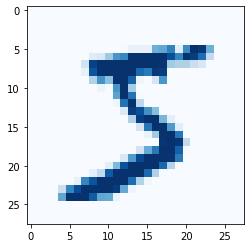

In [ ]:
# Plot the data:
observation = data[0].split(',') # break down observation number 0 (comma is used to identify each element).
image = np.asfarray(observation[1:]).reshape((28,28)) #asfarray returns an array converted as float
#print(image)
# take all the elements starting from the element 1
# (exclude element number 0, that corresponds to the label) and reshape them as an array with dimension 28 by 28.
mpp.imshow(image, cmap='Blues') # show the plot of this array using blue pallete.

In [ ]:
# Save an observation of the data as an input to work with:
input = np.array(np.asfarray(observation[1:]), ndmin=2).T # save necessary elements in a vertical vector shape.

In [ ]:
input.shape

(784, 1)

In [ ]:
input

array([[  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  

## Fitting the structure of the NN to the Data

Let’s take a look once again at the NN’s structure we have created at the beginning.

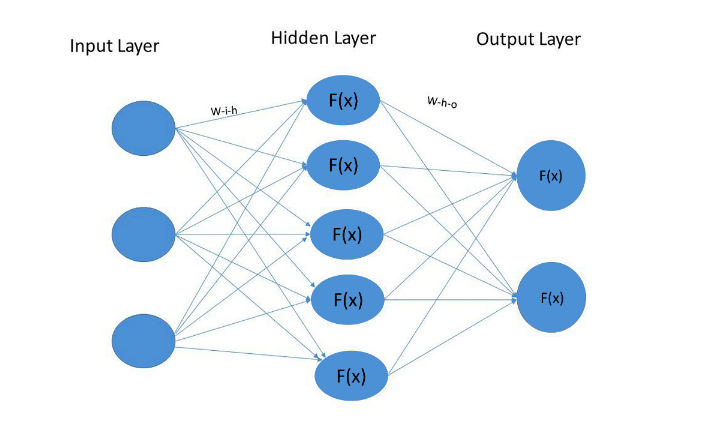




After inspecting the data, we can conclude that the structure with 3-5-2 nodes is probably not optimal and therefore should be updated in order to fit the data we have and peculiarities of the classification problem:

- For each observation we have 784 elements as an input (label element is excluded). Accordingly, instead of 3 input nodes we should better have 784.
- Similarly, as we have 10 different options for the outcome (handwritten numbers are labeled from 0 to 9) the number of output nodes should be 10 instead of 2.
- We also change the number of hidden nodes from 5 to 90. Such a number has been assigned based on some proportionality assumptions which will be checked later: 90 is 9 times higher than 10 and approximately 9 times smaller than 784.





In [ ]:
# Determine the new structure of the NN:
i_n = 784
h_n = 90
o_n = 10

As we have new structure of the NN we should reassign the weights - now the size of each weight matrix will increase as we have more nodes in each layer.

In [ ]:
# Determine the weights:
w_i_h = np.random.rand(h_n, i_n)
w_h_o = np.random.rand(o_n, h_n)

w_h_o

array([[6.31392385e-01, 1.53849088e-01, 8.68043960e-01, 8.02755139e-01,
        5.72387294e-01, 3.04497372e-01, 8.37583030e-01, 9.77222472e-01,
        1.71630485e-01, 5.26885653e-01, 3.87361110e-01, 4.25580120e-01,
        1.37613657e-01, 9.62019897e-01, 8.30409053e-01, 8.01459708e-01,
        6.77873514e-02, 3.03309621e-01, 2.85452520e-01, 7.59930394e-01,
        7.58925015e-01, 3.33542366e-01, 6.69806223e-01, 8.07234120e-01,
        7.61012821e-01, 3.73388497e-01, 5.47619962e-01, 8.11604284e-01,
        7.84417304e-01, 3.06959035e-01, 9.76073928e-01, 5.36585277e-01,
        4.95945147e-01, 4.16055279e-01, 4.25851077e-01, 6.22952799e-02,
        9.35823064e-01, 6.07317374e-01, 8.08081351e-01, 1.22383043e-01,
        2.96251120e-01, 3.32748098e-01, 6.51832760e-01, 7.71043925e-01,
        8.61356679e-01, 5.75822565e-01, 8.84662578e-01, 2.91246534e-02,
        3.97185031e-01, 9.02254719e-01, 8.57205140e-01, 7.31058768e-01,
        2.53967295e-01, 7.60902028e-01, 7.07264030e-01, 7.928562

So far we have not used the first element of our observation - the label. It will be necessary to compare the predictions of the NN to the real state of the world and to train the NN to make correct predictions. The target should therefore have the same shape as the output layer of the NN, so that they could be comparable. We can represent the label as a vector of n binary (0 or 1) elements (n corresponds to the number of nodes in the output layer). There should be only one element equal to 1 and the position of this element should correspond to the index number of the label we want to predict.

In [ ]:
observation[0]

'5'

In [ ]:
# Create target array:
target = np.array(np.zeros(o_n),ndmin=2).T
target[int(observation[0])] = 1 # int() method returns an integer object from any number or string.

In [ ]:
# Inspect how the target looks like (remember that the label of observations is 5):
target

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Show the sizes of matrices of weights, input and target vectors:
w_i_h.shape, input.shape, w_h_o.shape, target.shape

((90, 784), (784, 1), (10, 90), (10, 1))

## Feedforwarding

Once we have the structure of the NN updated for the specific task of classifying the numbers depicted on the images, we can run our network in order to get the first predictions that will be represented by a vector of 10 elements. This vector in its turn can be compared to the target.

To run the NN, i.e. to feed forward our input data in order to get some predictions, we should follow certain steps:

1. Multiply an input vector by a matrix of weights that connects it with the next layer;
2. Transform the result using activation function;
Use the output obtained in the 2nd step as an input vector for the next layer.
3. A sequence of this steps should be repeated n-1 times (where n corresponds to the number of layers). The output of the previous layer will always be the input vector for the next layer. In our case the procedure will happen twice.

In the picture bellow, you can see the procedure necessary to obtain the output of the hidden layer. The result of matrix multiplication here is called “Hidden_Input”. Result of the transformation of “Hidden_Input” through activation function is called “Hidden_Output”.

This output will be used as the input vector that should be multiplied by the next weight matrix and transformed through activation function in order to calculate the final output of the NN. If our NN would have more than one hidden layer, the procedure would be repeated more times.

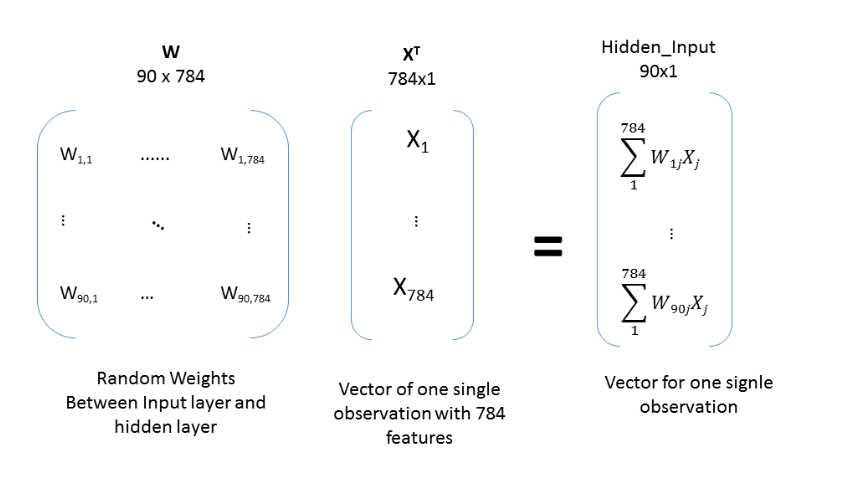



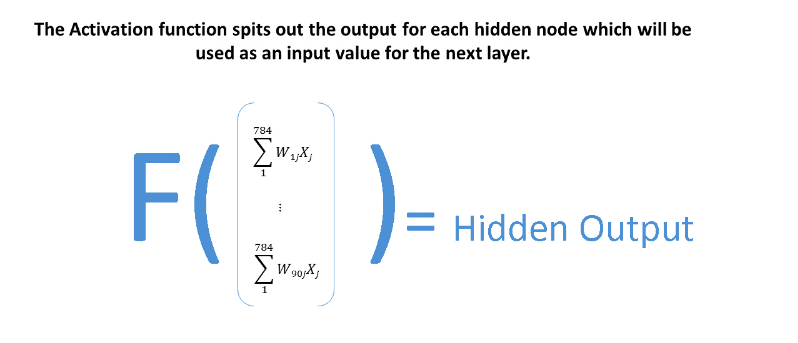


Below you can see the code implementation of all the steps for all layers of the NN.



In [ ]:
# Calculate the output of hidden and output layers of our NN:
h_input = np.dot(w_i_h, input) # dot() performs matrix multiplication; "h_input" stands for "Hidden_Input".
h_output = sigmoid(h_input) # "Hidden_Output" - result after activation function.
o_input = np.dot(w_h_o, h_output) # "Output_Input" - input used for the next layer.
o_output = sigmoid(o_input) # "Output_Output" - final output of the NN.


In [ ]:
# Show intermediate data and output:
# Uncomment the line of interest in order to see the the corresponding object.
# h_input
# h_output
#o_input
o_output

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## Data treatment good practices


Once we check the output of the NN and the results of each performed step, we can observe that already at the stage of the h_output all the data converts to a vector in which all the values are equal to 1. Such a vector does not provide us with any helpful insight. Apparently, something is wrong with what we have done so far. There could be several reasons for the problem we face.

**First of all, let’s take a look at our sigmoid function once again:**

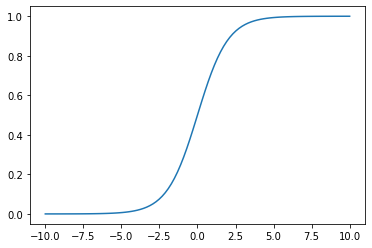

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

As we can see the output of the sigmoid function will be almost identical once we feed a number bigger than 2. Similarly there is no significant difference between the outputs if numbers used are smaller than -2. Hence the application of sigmoid function to the original data leads to a loss of valuable information. The NN has problems learning something from the inputs, which are almost undifferentiable.

One solution is to transform the input we have. Ideally we should have our data in a range between 0 and 1. It is also desirable to avoid zeros as inputs, because the hidden layer input of a zero input will always be zero, no matter how large the weights are, in which case the NN will not be able to use this input to learn.

We can perform a transformation of the original data as the one coded below:

In [ ]:

# Good practice transformation of the input values:
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01,ndmin=2).T
# Our values in our input vector are in the range from 0 to 255. Therefore we should divide input vector by 255,
# multiply it by 0,99 and add 0,01 in order to get values in the range from 0,01 to 1.

# Good practice transformation of the target value:
target = np.array(np.zeros(o_n) + 0.01,ndmin=2).T
target[int(observation[0])] = 0.99

In [ ]:
target

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.99],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [ ]:
int(observation[0])

5

**Secondly, we can check our way to randomly assign initial weights:**

Let’s take a look once at the function we used to randomly assign weights:

In [ ]:
np.random.rand(3, 5)

array([[4.90167574e-01, 2.23533495e-01, 8.10735820e-01, 7.44356832e-01,
        2.36472283e-01],
       [3.17475654e-01, 9.25854485e-01, 6.54953449e-01, 1.71267760e-01,
        6.52278473e-04],
       [3.72127548e-01, 2.60592107e-02, 1.28402521e-01, 4.96003223e-01,
        4.46934060e-01]])

As we can see, all the weights are positive, while the actual relationship between the features in the data and the values of the output vector can be negative. Hence, the way we employ to assign random weights should allow for negative weights too.

Below there are too alternatives how this can be implemented in Python.


In [ ]:
# Good practice for initial weights assignment:

alternative1 = np.random.rand(3, 5) - 0.5
# or
alternative2 = np.random.normal(0.0, pow(3, -0.5), (3, 5))
#Draw random samples from a normal (Gaussian) distribution
# arguments: Mean of the distribution, Standard deviation of the distribution, Output shape.
# Second approach is better as it takes in account the standard deviation
# that is related to the number of incoming links into a node, 1/√(number of neurons in layer).

#The whole point of that initialisation scheme (sometimes called "Xavier initialisation") is to mitigate the problem of disappearing gradients caused by the form of many activation functions.
# alternative1
alternative2

array([[-0.11199024, -0.6907354 ,  0.68764044,  0.07213339,  0.84645767],
       [ 0.19809772,  0.45373417,  0.0161601 ,  0.09957625, -0.02975916],
       [ 0.60590915, -0.5133373 , -0.20511255, -0.81074372, -0.77590401]])

In [ ]:
# Define the weights in accordance with the best practice:
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

Now that we have all the elements assigned in accordance with good practices, we can feedforward the data once again.



In [ ]:
o_input

array([[50.49396948],
       [45.62983069],
       [46.71882033],
       [41.13178978],
       [46.62852594],
       [45.66958584],
       [46.79849391],
       [47.76650706],
       [46.43710835],
       [47.26988656]])

In [ ]:
# Run NN to get new classification of the particular observation:
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)
o_output


array([[0.6191399 ],
       [0.92297718],
       [0.15666661],
       [0.41734551],
       [0.87560876],
       [0.18147685],
       [0.0292229 ],
       [0.87520969],
       [0.56191624],
       [0.89316277]])

## First evaluation of the results


Once we have obtained the output of the NN, we can compare it to the target.



In [ ]:
target

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.99],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [ ]:
nn_trained_output= np.array([[0.2],[0.1],[0.3],[0.2],[0.2],[0.85],[0.1],[0.2],[0.2],[0.2]])

In [ ]:
# Calculate the errors of the classification:
o_errors = target - o_output
o_errors

array([[-0.6091399 ],
       [-0.91297718],
       [-0.14666661],
       [-0.40734551],
       [-0.86560876],
       [ 0.80852315],
       [-0.0192229 ],
       [-0.86520969],
       [-0.55191624],
       [-0.88316277]])

In [ ]:
o_errors_trained = target - nn_trained_output

In [ ]:
target

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.99],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [ ]:
nn_trained_output

array([[0.2 ],
       [0.1 ],
       [0.3 ],
       [0.2 ],
       [0.2 ],
       [0.85],
       [0.1 ],
       [0.2 ],
       [0.2 ],
       [0.2 ]])

In [ ]:
o_errors_trained

array([[-0.19],
       [-0.09],
       [-0.29],
       [-0.19],
       [-0.19],
       [ 0.14],
       [-0.09],
       [-0.19],
       [-0.19],
       [-0.19]])

The result we would like to achieve should look like as a vector of values where almost all values are negligibly small.
It is not the case now. Nevertheless one should remember that so far all the weights have been assigned randomly and no training has been performed yet. In any case, it is not a vector of ones anymore, which is an improvement.

Thus, we can proceed to the next stage, which is to find out where the errors come from and how they can be minimized.



```
# This is formatted as code
```



## Backpropagation

Back propagation is a learning algorithm which aims to minimize the errors/cost function of the NN. Through this learning algorithm, the random weights and biases which were initially given to the network will be optimized to give the best output.

Output of each node is the sum of the multiplications of the output of previous nodes by certain weights. Therefore we can associate how much error is coming with every weight and how much error has been brought from each particular node from the previous layer.

To understand this better it is worth imagining the following example:

- node 1 in the output layer of the NN should be equal to 0,01 ;
- instead the NN is providing us with 0,8.

In this case we should do the following:

1. Calculate the error of the node (-0,79 in our example);

2. Calculate how much error has been brought by every link to this node.

For instance if weight w11 is 0,6 and w21 is 0,4 then they are associated with an error of -0,79 multiplied by 0,6 and -0,79 multiplied by 0,4 respectively (see Pictures below).

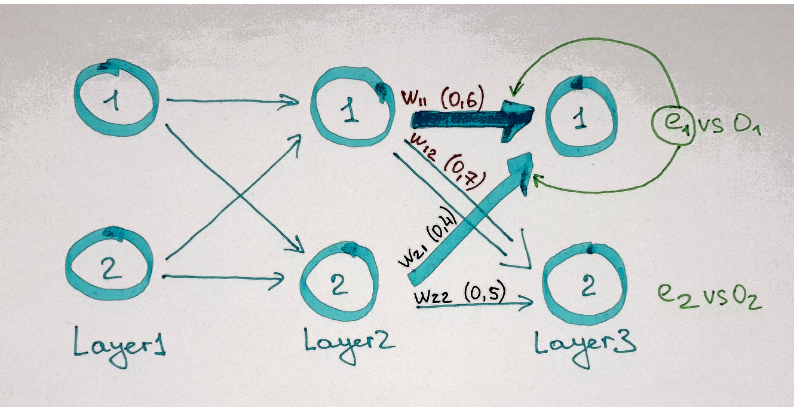

After calculation of how much error is associated with every weight we can obtain the errors for the nodes in the proceeding layer.

For instance error term for node 1 in the hidden layer will be equal to:

the sum of errors associated with all the weights (w11 and w12 in our case) that link this node with the next layer (see Picture above).

Once we repeat this procedure for all the nodes in all layers we can find out how much every node should be changed.

To do so in Python we just need to make multiplication of vector that contain errors by corresponding matrix of weights.

In [ ]:
# Find the errors associated with hidden layer output:
h_errors = np.dot(w_h_o.T, o_errors)
h_errors[0:90] # errors in the hidden layer - show the first 10 nodes out of 90.

array([[-0.24028252],
       [-0.7908793 ],
       [ 0.87841902],
       [-0.79045734],
       [-0.42991409],
       [-0.44705448],
       [-0.91219073],
       [-0.7510259 ],
       [ 0.32998829],
       [-0.90195225],
       [-0.27623978],
       [-1.22537423],
       [ 0.43486714],
       [ 1.04283891],
       [ 0.43559161],
       [-1.25851775],
       [-0.06338641],
       [ 0.62705923],
       [-1.13411368],
       [-0.80197653],
       [-0.79623344],
       [ 0.03483357],
       [ 1.28801998],
       [ 0.82116307],
       [ 0.34218991],
       [ 1.06925187],
       [-0.11499139],
       [ 1.91994556],
       [ 1.07320941],
       [ 0.18939881],
       [-1.1815096 ],
       [-0.05738419],
       [-0.37019459],
       [ 0.08247639],
       [-0.55162217],
       [ 0.24154146],
       [-0.592706  ],
       [ 0.85607024],
       [ 0.78330708],
       [-0.49199269],
       [-0.17134421],
       [ 0.21494077],
       [-0.85732686],
       [ 0.39593517],
       [-0.67162439],
       [-0

## Gradient descent


Gradient descent is one the most popular algorithms to optimize the neural networks. The name gradient descent is rooted in the procedure where the gradient is repeatedly evaluated to update the parameters. The objective of the gradient descent is to find weight parameters that will minimize the cost function.

To understand the concept of gradient descent we should ask ourselves the following question: What can be done to improve the weights we have assigned randomly at the beginning, so that the overall result improves?

To change the output of any node we should change the weights that connect it with the previous layer. Basically we want to find out how much error in every node changes once we change associated weights. Next we want to select the weights that would lead to a minimal error in the output layer. That can be achieved by differentiation of the cost function and search for its minimum.

Given multidimensionality of the function, which we need to differentiate, the search for its minimum can be a complicated task. This task is similar to some extent to the search of the path in the darkness from the top of a mountain to its valley. Because it is dark it is almost impossible to reach the valley immediately. The only way to achieve the goal is by exploring the neighbourhood (the radius you are able to see) and tacking small steps in the direction that leads downhill and constantly updating the path for the next steps. This process is illustrated below:

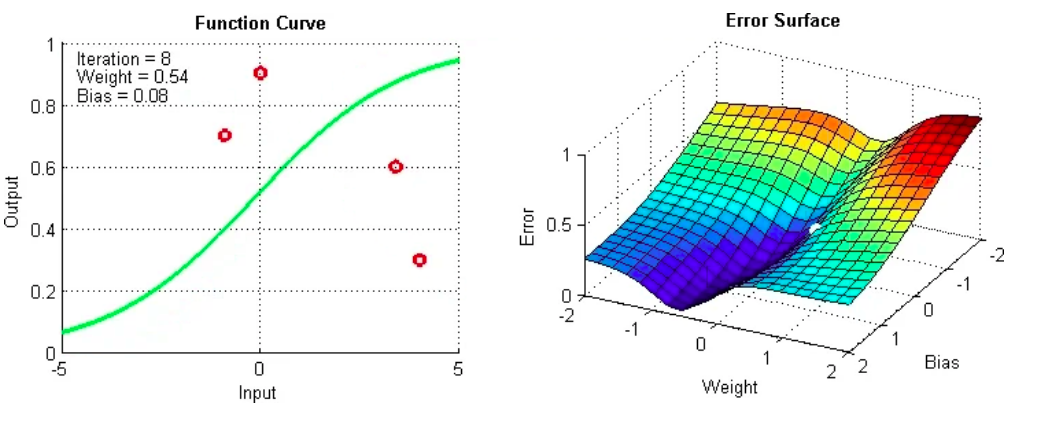

https://giphy.com/gifs/deep-learning-8tvzvXhB3wcmI/fullscreen

Mathematically the differentiation process can be illustrated on the example of weights between output and hidden layers (w_ho). The same process but with corresponding values should be applied for the weights between input and hidden layers (w_ih).

As it can be seen from the formulas below the error we want to minimize (E) can be defined as the sum of squared differences between the target (t_n) and output (o_n) values of the NN. The sum of differences for all the nodes in the layer is relevant but when doing calculation for a particular node this sum can be omitted - only the difference between particular output (o_o) and target (t_o) matters.

Target value is constant. Output value depends on weights and is obtained after applying sigmoid function to the sum of inputs (outputs of the previous layer - oh) multiplied by corresponding weights (w_ho).
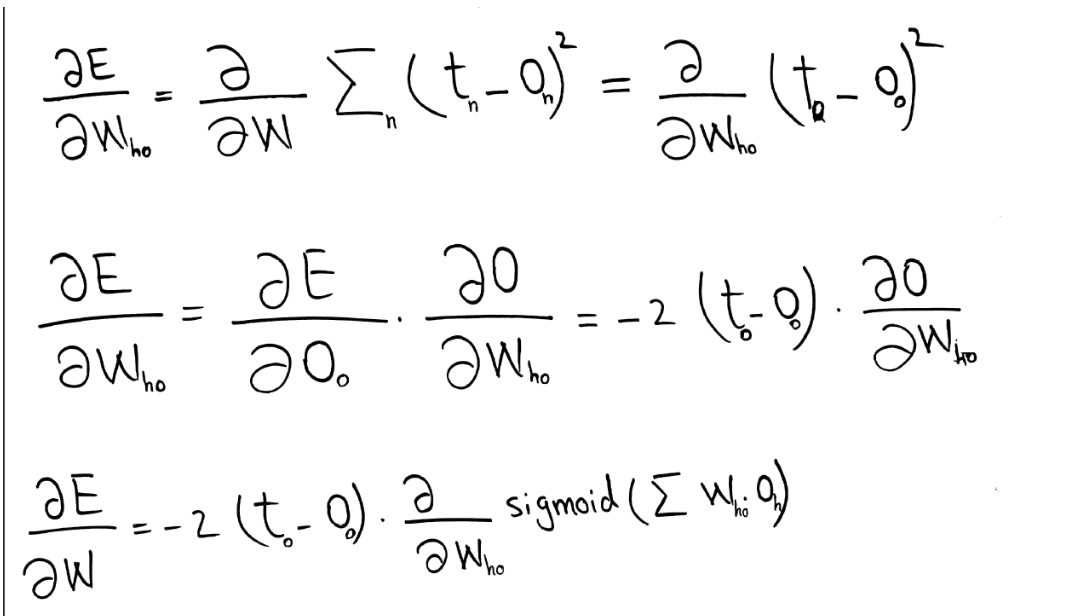

The formula for derivative of the sigmoid function is provided below. It is necessary to keep in mind that the sum to which we apply sigmoid function also depends on the change of weights (who). Therefore one should follow the chain rule for derivation.

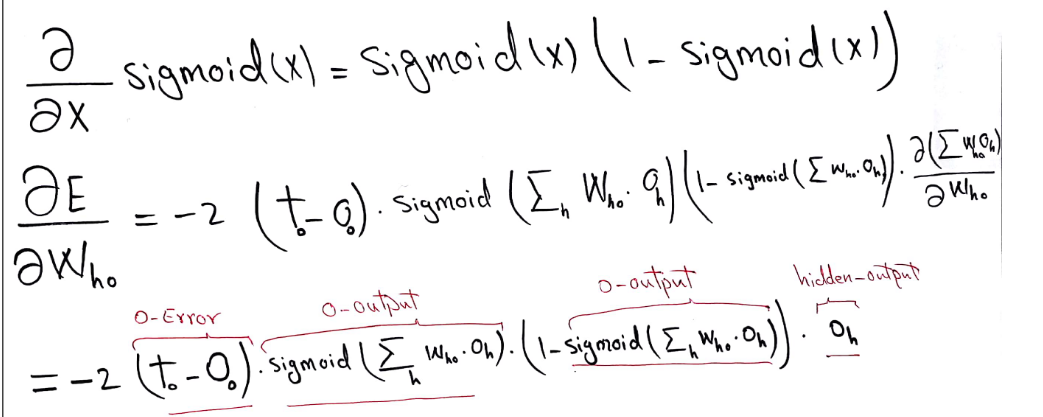



The formula we derive is for one particular node. We can however apply it to all the nodes in the layer. In order to do so the only thing we need is to consider this formula in matrix notation. Thus, necessary update of weights linked to all the nodes in a layer will be calculated.

After solving the minimization problem we can update the weights we have assigned before.

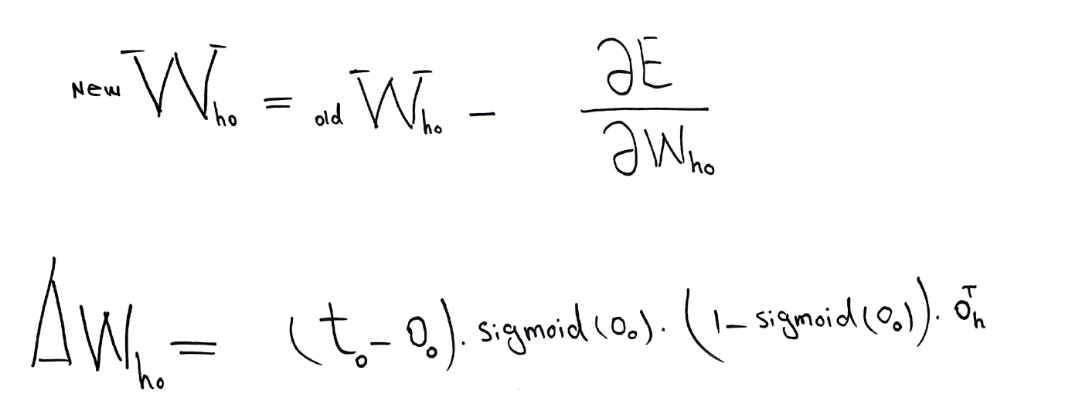

In code this can be represented as follows:



In [ ]:
# Update the matrix for weights between hidden and output layers:
w_h_o += np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
#w_h_o_new = w_h_o + np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))

# Update the matrix for weights between input and hidden layers:
w_i_h += np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

## Learning Rate


Now, there is something else, we should add in the weights updating procedure. If we completely change our weights with every new observation - our model learns to predict only the last input. Instead of updating weights 100 % every time we can change them only partially - this way every new observation will bring some new knowledge while the previous one will still be in memory even though updated to certain extent. The bigger the learning rate the more importance has the current observation (Weight), the smaller it is the more important is all the previous observations knowledge. The smaller the steps - the more accurate will be the prediction. At the same time it might take more time to learn.

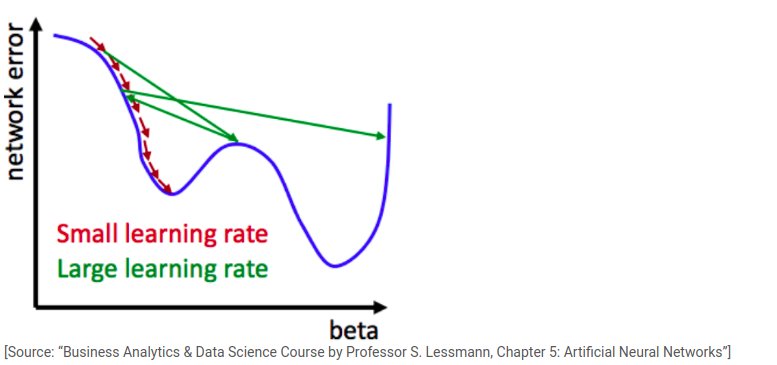


Below is the code for weight’s update procedure with learning rate included.

In [ ]:
# Define the learning rate:
l_r = 0.3

# Update the weights for the links between the hidden and output layers:
w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
# Update the weights for the links between the input and hidden layers:
w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

##Training


So far we have been working with one particular observation. Let’s put all the steps done before in a for-loop, so that we can perform them for all observations in our training set. More observations will allow the NN to learn from more information. Every time a new observation is feedforwarded, the error term backpropagated and the cost function minimized, the matrices of weights become more capable to label yet unknown observations.

In [ ]:
for i in data:
    observation = i.split(',')
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
    target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
    target[int(observation[0])] = 0.99

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    o_errors = target - o_output
    h_errors = np.dot(w_h_o.T, o_errors)

    w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
    w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

    pass

##Second evaluation of the results


Once we have trained the model with 100 observations we can test it with new data it has never seen. After loading the test set we can first work with a particular observation to get an intuition about how good our NN can solve considered classification problem.



In [ ]:
# Load the mnist test data CSV file:
raw_data_test = open(path +"mnist_test.csv", 'r')
data_test = raw_data_test.readlines()
raw_data_test.close()

7


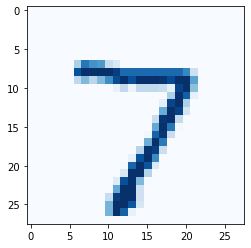

In [ ]:
# Check a particular observation:
observation = data_test[0].split(',')
# Print the label:
print(observation[0])
# Image the number:
image = np.asfarray(observation[1:]).reshape((28,28))
mpp.imshow(image, cmap='Blues', interpolation='None')

In [ ]:
# Use this observation as an input and run NN with it:
input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
h_input = np.dot(w_i_h, input)
h_output = sigmoid(h_input)
o_input = np.dot(w_h_o, h_output)
o_output = sigmoid(o_input)

o_output

array([[0.13945619],
       [0.01310487],
       [0.01299054],
       [0.09298832],
       [0.0637123 ],
       [0.01447846],
       [0.02141962],
       [0.85642108],
       [0.0203402 ],
       [0.02793071]])

In [ ]:
# Get the prediction of NN for this test observation:
label = np.argmax(o_output)
label

7

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import pandas as pd

After working with a particular observation from the test set we can label all of them and evaluate the accuracy of our NN.

'

In [ ]:
# Test the neural network using all test dataset:

score = [] # create a list in which the predictions of the network will we saved.

# Go through all the observations in the test data set:
for i in data_test:
    observation = i.split(',')
    expected = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)

    if (label == expected):
        score.append(1)
    else:
        score.append(0)
        pass

    pass

In [ ]:
# Calculate the performance score, the fraction of correct answers:
score_array = np.asarray(score)
print ("performance = ", score_array.sum() / score_array.size)

performance =  0.5907


it is several times better than naive, which would be 0.1 (given that we have 10 levels of the categorical variable we have to classify). Can we do better?

##Further Improvements


**Training with several epochs**

One way to improve the results of the NN is to train it more. For instance we can feedforward the same 100 observations more than once. Despite the fact that these are the same observations, longer training allows NN to accumulate more knowledge. Keep in mind that due to the presence of a learning rate NN receives only part of the information that is available and useful to predict particular observation. Seeing the same observations several times leads to smaller loss of the data.

So let’s introduce one extra parameter called “epochs” and create a loop around the number of epochs. The rest of the code we see below is the same as before.

In [ ]:
epochs = 5


In [ ]:
# The "big loop" with epochs:
for e in range(epochs):
    for i in data:
        observation = i.split(',')
        input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
        target = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
        target[int(observation[0])] = 0.99

        h_input = np.dot(w_i_h, input)
        h_output = sigmoid(h_input)
        o_input = np.dot(w_h_o, h_output)
        o_output = sigmoid(o_input)

        o_errors = target - o_output
        h_errors = np.dot(w_h_o.T, o_errors)
        w_h_o += l_r * np.dot((o_errors * o_output * (1.0 - o_output)), np.transpose(h_output))
        w_i_h += l_r * np.dot((h_errors * h_output * (1.0 - h_output)), np.transpose(input))

        pass
    pass


# test
score = []

for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    input = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_input = np.dot(w_i_h, input)
    h_output = sigmoid(h_input)
    o_input = np.dot(w_h_o, h_output)
    o_output = sigmoid(o_input)

    label = np.argmax(o_output)
    if (label == correct_label):
        score.append(1)
    else:
        score.append(0)
        pass

    pass


# calculate accuracy
score_array = np.asarray(score)
print ("performance = ", score_array.sum() / score_array.size)

performance =  0.6491


**Training with other l_r**

The smaller the learning rate the more capable the network to optimize the weights in a more accurate way. At the same time one should keep in mind that small l_r also means additional loss of information extracted from each particular observation. Hence, there should be many training observations available in order to make the trade-off between accuracy and usage of available data reasonable. Given that we have more epochs now, it is interesting to try a smaller learning rate.



In [ ]:
l_r = 0.1

# run the "big loop" with epochs again to get measure accuracy for new settings.

**A more complicated structure**

As you may remember in the beginning we have assigned the number of nodes in the hidden layer based on some rule of thumb assumptions. Now we can test if the NN will perform better if we increase the number of hidden nodes.

In [ ]:
h_n = 150

# Determine the weights for a bigger matrices
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings.

It is always possible to train neural networks where the number of neurons is larger. But, with a smaller number of neurons the neural network has much better generalization abilities.

**Overfitting**. To many nodes is one of the reasons that leads to a problem when the neural network is over trained which would mean that it will fail to recognize patterns which were never used in the training.

With a smaller number of neurons, it is more complicated to train the network to very small errors, but it may produce much better approximations for new patterns. The most common mistake made by many researchers is that in order to speed up the training process and to reduce the training errors, they use neural networks with a larger number of neurons than required. Such networks could perform poorly for new patterns not seen previously by the NN.

**Other training set**

One other source of improvement is providing the NN with a relatively big dataset for training. Everything that was done before was implemented with just 100 observations. Let’s see if our results improve if we increase our training dataset to 60 000 observations. As we have more data now we will reduce the number of epochs and keep having low learning rate.

In [ ]:
# Load the data
raw_data = open(path+"mnist_train.csv", 'r')
data = raw_data.readlines()
raw_data.close()

# Settings
epochs = 2
l_r = 0.1
h_n = 90
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings

The result we achieve with a big training set is already pretty impressive. In more than 90 % of cases our NN is able to solve the classification problem properly. And we should remember that it was implemented from scratch using only basic linear algebra packages. Let’s see in the following section if we can do better or if we can simplify the process using specialized packages to build neural networks.

#Neural Networks with Keras

We are now going to reimplement the previous neural network with the Keras framework. Keras is an open source neural network library written in Python. It has the advantage of abstracting most of the boiler-plate code one needs to write when implementing a neural net only with a linear algebra library. Thus, it is suitable to fast prototyping and experimentation.

It’s important you make sure you have the required libraries installed for it to work. We will make use of three main libraries and their dependencies, which will be automatically installed.

If you are using Anconda’s Python distribution, we advise you to run conda install keras pandas numpy on the terminal. Otherwise, using the pip package manager should also do the trick. Run pip install keras pandas numpy on the terminal.

The version of Python that will be used throughout this notebook is Python 3.6.4 from Anaconda’s distribution. You can check your version of Python by executing the cell below.

In [ ]:
!python --version

Python 3.7.10


##Load the data

To load the data, we will use the very handy panda's read_csv function. It frees us from the burden of parsing the text file.



In [ ]:
names = ["y"] + list(range(1,785))


df = pd.read_csv(path+"mnist_train.csv",
                 names=names)

df_test = pd.read_csv(path+"mnist_test.csv",
                     names=names)

In [ ]:
df.shape

(60000, 785)

In [ ]:
df_test.shape

(10000, 785)

Next we separate labels from features in both train and test set and transform them from dataframes to numpy arrays, which are better suited for modeling.

In [ ]:
df.head()

,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = df['y'].values
X_train = df.iloc[:, 1:].values/255*0.99+0.01

y_test = df_test['y'].values
X_test = df_test.iloc[:, 1:].values/255*0.99+0.01

[y_train, y_test, X_train, X_test]

[array([5, 0, 4, ..., 5, 6, 8]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]),
 array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])]

We now check if the shape of the arrays correspond to the expected. In fact, the shape is correct. We have 60 thousand observations in the train set and 10 thousand in the test set.

In [ ]:
[y_train.shape, X_train.shape, y_test.shape, X_test.shape]


[(60000,), (60000, 784), (10000,), (10000, 784)]

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

Before defining the model, one extra step is necessary: transform the labels so they are one-hot encoded. One-hot encoding a vector means transforming it into a matrix of ones and zeroes only with as many columns as the number of different values in the vector. In the specific case, the label vector becomes a ten-column array, each column representing one digit. If the label of the observation is 2, it will have zeroes in columns expect in the third column, which will have a one. The number of rows remains the same.

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

[y_test.shape, y_train.shape]

[(10000, 10), (60000, 10)]

In [ ]:
y_train.shape


(60000, 10)

##Model

We finally come to the most important part. We will accomplish the task of building the neural network with only eight lines of code. But before we dive into that, a few words about the activation function and the optimizer are due.

##Activation Functions and Gradient Descent
The activation functions are compared to each other in terms of their efficient approximation (Schnitger & DasGupta, 1993). There are several types of them but the common ones are the sigmoid, tangent hyperbolic and the ReLU functions. The following is a short explanation on the advantages and disadvantages of each of these activation functions.

- **Sigmoid function:** This function squashes the input value into a value in the range of [0,1]. It is powerful to compute bolean functions and the smoothness of sigmoid allows for better approximation (Schnitger & DasGupta, 1993). However, there are two major drawbacks. First, the sigmoid outputs 0 for high negative values and 1 for high positive values and this result in no signal flows from the nodes because the gradient at these two tails are 0. Second, its output is not centered at 0. This would ultimately result in either all positive gradients on weights or all negative during the backpropogation.

- **Tangent hyperbolic:** Unlike to sigmoid, this function’s output is zero cantered and outputs a value in the range of [-1,1]. Although it is more preferred over sigmoid but it suffers from the same problem because it kills the gradient descent at high or low values.

- **ReLU:** This function is zero whenever input is negative and when the input is positive, its behaviour is linear with slope 1. According to Glorot et al. (2011), the ReLU activation functions outperform sigmoidal functions in Deep Neural Networks on text classification and image recognition tasks. ReLU also excels the sigmoid and tangent hyperbolic in accelerating the stochastic gradient descent convergence. However, the ReLU is not prone to the training process and the nodes can die. This means that if a large gradient runs through the nodes, it may update the weights in a way that the node will never be active for any inputs again and this will result in gradient of zero from that node onward.

As we mentioned before gradient descent is one the most popular algorithms to optimize the neural networks. There are many variations of this algorithm. The most popular of them are Mini-batch Gradient Descent and the Stochastic Gradient Descent.

- The **Mini-batch Gradient Descent (BGD)** is used when there is a large scale training data set where the computation of the cost function over the whole training data set is computationally expensive. Therefore, a batch of the training data set, say 250 observations, is randomly selected to compute the gradient with the assumption that the observations in the training dataset are correlated.
- If this procedure is done only one observation instead of 250, but with 250 iterations, then this procedure is called **Stochastic Gradient Descent (SGD)**. This approach is repeatedly sampling a training example, which is used to evaluate the gradient. Sometimes it is considered less efficient as the loss function calculated 250 times based on a single sampled training example can be noisy.
You can learn more about different types of activation functions and optimizers using the official documentation of the keras package:

- https://keras.io/optimizers/
- https://keras.io/activations/
.



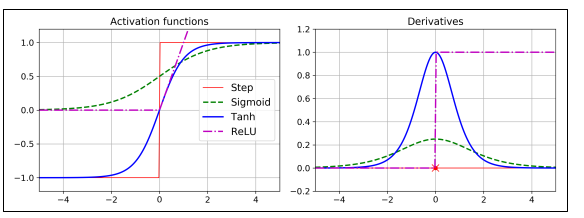


##Define the model

The model in question consists of one input, one hidden and one output layer. The activation function of the hidden layer is a ReLU. And we use as the optimizer Stochastic Gradient Descent.

Once the activation function and optimizers are selected, it is time to determine the structure of the NN. Keras makes it very simple to add new layers. One needs only to call the add method on the model and pass the layer with its specifications. As you can see, the number of inputs needs to be specified only in the first layer. Keras infers the input number of a layer by looking at the number of outputs of its predecessor.

For this neural network, we will only use dense layers, which are layers with all nodes fully connected to each other. Keras, however, allows you to arbitrarily build your neural networks by providing different types of layers, such as convolutional and pooling layers.

In [ ]:
def baseline_model(num_hidden_n, num_pixels, num_classes, optimizer):
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #you can add more hidden layers etc.
    #model.add(Dense(50, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

##Instantiate the model
Having defined the structure of the model, we can now instantiate a concrete version of it by picking the relevant parameters and calling the function that returns the model object.

Here we have chosen the hidden layers to have 90 nodes, while input and output layers have 784 and 10 nodes respectively.

In [ ]:
num_pixels, num_hidden_n, num_classes = 784, 90, 10
optimizer = 'sgd'

model = baseline_model(num_hidden_n, num_pixels, num_classes, optimizer)

##Train and evaluate the model
With the model instantiated, we can finally call the fit method on it using the data set we prepared before.

After training the model we evaluate its performance by looking at its accuracy.

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200,
          verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
300/300 - 1s - loss: 0.4566 - accuracy: 0.8804
Epoch 2/5
300/300 - 1s - loss: 0.4245 - accuracy: 0.8857
Epoch 3/5
300/300 - 1s - loss: 0.4012 - accuracy: 0.8900
Epoch 4/5
300/300 - 1s - loss: 0.3839 - accuracy: 0.8942
Epoch 5/5
300/300 - 0s - loss: 0.3698 - accuracy: 0.8971
Error Rate: 9.64%


The error rate does not seem very good. Maybe we could try a different optimizer. We will instantiate and fit the model again with the RMSprop optimization algorithm. By using Keras, the only thing you need to do is to pass a different argument to the model.

In [ ]:
model = baseline_model(num_hidden_n,
                       num_pixels,
                       num_classes,
                       optimizer = "adam")

model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=200,
          verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
300/300 - 1s - loss: 0.5536 - accuracy: 0.8600
Epoch 2/5
300/300 - 1s - loss: 0.2522 - accuracy: 0.9281
Epoch 3/5
300/300 - 1s - loss: 0.2011 - accuracy: 0.9431
Epoch 4/5
300/300 - 1s - loss: 0.1645 - accuracy: 0.9527
Epoch 5/5
300/300 - 1s - loss: 0.1385 - accuracy: 0.9599
Error Rate: 3.92%


Learning rate has been overlooked for a while but currently a lot of research is looking into it.
**Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results**. However, learning rate doesn't have to be remained constant. We will try different learning rate schedules for our NN.

The SGD optimization algorithm in Keras has an argument called **decay**. This argument is used in the time-based learning rate decay schedule equation as follows:
LearningRate = LearningRate * 1/(1 + decay * epoch) (if decay=0 then there is no change)

Another term to know is **momentum**. Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.

$$\Delta  W_k(i) = -\eta  \frac{\partial E}{\partial W_k} + \mu  \Delta W_k(i-1)$$


$\mu$ is a momentum term here. Imagine if at some point gradient is zero, it would put the backpropagation to stall. Here momentum comes to the rescue - the **algorithm remembers its last step, and adds some proportion of it to the current step**. This way, even if the **algorithm is stuck in a flat region, or a small local minimum, it can get out and continue towards the global minimum**. **So learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step.** 
SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. 

Why momentum works?
Lets talk a little bit about why momentum most of the times will be better than classic SGD.
With Stochastic Gradient Descent we don’t compute the exact derivate of our loss function. Instead, we’re estimating it on a small batch. Which means we’re not always going in the optimal direction, because our derivatives are ‘noisy’.  Momentum can provide us a better estimate which is closer to the actual derivate than our noisy calculations. This is one reason why momentum might work better than classic SGD.
The other reason lies in ravines. Ravine is an area, where the surface curves much more steeply in one dimension than in another. Ravines are common near local minimas in deep learning and SGD has troubles navigating them. SGD will tend to oscillate across the narrow ravine since the negative gradient will point down one of the steep sides rather than along the ravine towards the optimum. Momentum helps accelerate gradients in the right direction.


In [ ]:
# Compile model
from keras.optimizers import SGD

learning_rate = 0.1
epochs = 10
decay_rate = learning_rate / epochs
momentum = 0.8
num_pixels, num_hidden_n, num_classes = 784, 90, 10
def baseline_model_sgd(num_hidden_n, num_pixels, num_classes):
    model = Sequential()
    #first hidden layer
    model.add(Dense(num_hidden_n, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #you can add more hidden layers etc.
    #model.add(Dense(50, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate=learning_rate, decay=decay_rate, nesterov=False, momentum=momentum),
                  metrics=['accuracy'])
    return model


#sgd = SGD(lr=learning_rate, decay=decay_rate, nesterov=False, momentum=momentum)
model = baseline_model_sgd(num_hidden_n,
                       num_pixels,
                       num_classes)


model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=200,
          verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 1s - loss: 0.4554 - accuracy: 0.8693
Epoch 2/10
300/300 - 0s - loss: 0.2761 - accuracy: 0.9219
Epoch 3/10
300/300 - 0s - loss: 0.2504 - accuracy: 0.9290
Epoch 4/10
300/300 - 0s - loss: 0.2359 - accuracy: 0.9331
Epoch 5/10
300/300 - 0s - loss: 0.2261 - accuracy: 0.9367
Epoch 6/10
300/300 - 0s - loss: 0.2186 - accuracy: 0.9389
Epoch 7/10
300/300 - 0s - loss: 0.2127 - accuracy: 0.9406
Epoch 8/10
300/300 - 0s - loss: 0.2079 - accuracy: 0.9425
Epoch 9/10
300/300 - 0s - loss: 0.2039 - accuracy: 0.9435
Epoch 10/10
300/300 - 0s - loss: 0.2003 - accuracy: 0.9446
Error Rate: 5.72%


In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=e0997e5250aefb46abbf1330db5396f73c247a0df273dabc806d9eeffffc286a
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=cd323b84a5ecad2ec4a4333b751926c600f8d0ae1499340121db0c2e111606c4
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


[Keras Tuner](https://keras-team.github.io/keras-tuner/) offers the main hyperparameter tuning methods: [random search](https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner), Hyperband, and [Bayesian](https://www.sicara.ai/blog/2019-14-07-determine-network-hyper-parameters-with-bayesian-optimization) optimization.
The most intuitive way to perform hyperparameter tuning is to randomly sample hyperparameter combinations and test them out. This is exactly what the RandomSearch tuner does!

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
#Keras Tuner offers the main hyperparameter tuning methods: random search, Hyperband, and Bayesian optimization.

def build_model(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, you say min, max and a step size, first value it will check is 32, then 160 etc.
    # you can vary activation function as well
    model.add(layers.Dense(units=hp.Int('units',
                                        min_value=32,
                                        max_value=512,
                                        step=128),
                           activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

The objective is the function to optimize. The tuner infers if it is a maximization or a minimization problem based on its value.

Then, the max_trials variable represents the number of hyperparameter combinations that will be tested by the tuner, while the execution_per_trial variable is the number of models that should be built and fit for each trial for robustness purposes. 
These settings here will mostly depend on your computing time and resources. The highest number of trials you can perform, the better! Regarding the number of epochs, it's best if you know how many epochs your model needs to converge. You can also use early-stopping to prevent overfitting.

In [ ]:
cd

/root


In [ ]:
tuner = RandomSearch(
    #provide it the build_model function
    build_model,
    objective='val_accuracy',
    #max_trials represents the number of hyperparameter combinations that will be tested by the tuner, while execution_per_trial is the number of models that should be built and fit for each trial for robustness purposes.
    #max number of trials,  model config to test at most
    max_trials=5,
    # in each trial will do 3 different models
    # the number of models that should be built and fit for each trial
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld3')

In [ ]:
# tells you how many hyperparameters you are looking for ,2 hidden unit params and learning rate
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# now we fit data, tuner.search is aq to model.fit
#Here's what happens in search: models are built iteratively by calling the model-building function, which populates the hyperparameter space (search space) tracked by the hp object. The tuner progressively explores the space, recording metrics for each configuration.
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test,y_test))

Trial 5 Complete [00h 01m 03s]
val_accuracy: 0.9764666557312012

Best val_accuracy So Far: 0.9800666769345602
Total elapsed time: 00h 06m 19s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#shows hyperparameters and accuracy
tuner.results_summary()

Results summary
Results in my_dir/helloworld3
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.001
Score: 0.9800666769345602
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.001
Score: 0.9764666557312012
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.01
Score: 0.9626666903495789
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.9616333246231079
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.953166663646698


In [ ]:
def build_model_1(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, you say min, max and a step size, first value it will check is 32, then 160 etc.
    # you can vary activation function as well
    model.add(layers.Dense(units=hp.Choice('units',[32,160]),
                           activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
# create instance of RandomSearch
tuner1 = RandomSearch(
    #provide it the build_model function
    build_model_1,
    objective='val_accuracy',
    #max number of trials,  model config to test at most
    max_trials=4,
    # in each trial will do 1 different models
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld5')

In [ ]:
# now we fit data, tuner.search is aq to model.fit
tuner1.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 21s]
val_accuracy: 0.9642000198364258

Best val_accuracy So Far: 0.9761000275611877
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# different numbers of hidden layers
def build_model_2(hp):
    model = keras.Sequential()
    #hp.int specifies its an integer number, vary btw 2 and 6 hidden layers, step size is 1 by default
    for i in range(hp.Int('layers',2,6)):
      model.add(layers.Dense(units=hp.Int('units_' + str(i),# prints units for each hidden layer
                                        min_value=50, # number of nodes in each layer
                                        max_value=100,
                                        step=10),
                             # activation function can be a list of choices:
                           activation= hp.Choice('act_' + str(i),['relu','tanh'])))
    #output stays out of for loop
    model.add(layers.Dense(10, activation='softmax'))

    # hp.choice when you want to try different choices
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
# create instance of RandomSearch
tuner2 = RandomSearch(
    #provide it the build_model function
    build_model_2,
    objective='val_accuracy',
    #max number of trials,  model config to test at most
    max_trials=4,
    # in each trial will do 1 different models
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld2')

In [ ]:
tuner2.search_space_summary()
#default search space is 5, when you do a for loop, number of 2 to 6, by default it considers number of layers to be 2
#layers/ units in 0/ acti in 0 /units in 1 / act in 1 --> sums search space size to 5
# later it will change number of layer to 3/4/6

Search space summary
Default search space size: 5
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}


In [ ]:
# now we fit data, tuner.search is aq to model.fit
tuner2.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 41s]
val_accuracy: 0.9739000201225281

Best val_accuracy So Far: 0.9739000201225281
Total elapsed time: 00h 02m 29s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#showing 10 best trials, but here only 4 cause we set max trials to 4
# this would have taken a lot of time manually
tuner2.results_summary()

Results summary
Results in my_dir/helloworld2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layers: 5
units_0: 80
act_0: relu
units_1: 60
act_1: tanh
units_2: 70
act_2: tanh
units_3: 60
act_3: tanh
units_4: 60
act_4: relu
Score: 0.9739000201225281
Trial summary
Hyperparameters:
layers: 5
units_0: 70
act_0: tanh
units_1: 70
act_1: relu
units_2: 90
act_2: relu
units_3: 80
act_3: relu
units_4: 50
act_4: relu
Score: 0.9710000157356262
Trial summary
Hyperparameters:
layers: 4
units_0: 100
act_0: tanh
units_1: 90
act_1: relu
units_2: 50
act_2: relu
units_3: 50
act_3: relu
Score: 0.97079998254776
Trial summary
Hyperparameters:
layers: 5
units_0: 50
act_0: relu
units_1: 70
act_1: relu
units_2: 70
act_2: tanh
units_3: 100
act_3: tanh
units_4: 50
act_4: tanh
Score: 0.9700999855995178


In [ ]:
# use hp.Choice for a list of parameters, hp.float, hp.bolean

## Save the model
Once trained, you might want to use the model in the future. You can do so by saving it to a file for later use. Keras comes equipped with the save method, which allows you to easily save your trained model to the disk.

We are going to save the model into a file called model.h5 and delete it from memory.

For more infoa on how to save a keras model, see this [link](https://machinelearningmastery.com/save-load-keras-deep-learning-models//) 

In [ ]:
model.save("model.h5")
del model

Then we load the model from the file we just created and evaluate it again to make sure that during the saving process, the model hasn’t been corrupted. The error rate is the same: the model has been successfully saved and can be shared with third-parties.

In [ ]:
from keras.models import load_model

model2 = load_model("model.h5")

scores2 = model2.evaluate(X_test, y_test, verbose=0)
print("Error Rate: %.2f%%" % (100-scores2[1]*100))

Error Rate: 3.78%


# Conclusion
We have shown how to implement a neural network in Python from scratch while explaining the intuition and mathematics behind each concept. We also compared the result of our work with other ready-to-use packages such as Keras and we noticed that the accuracy of our basic neural network is reasonable taking into account the more advanced optimizers available in Keras and used in the second part of the tutorial.

You should now have a clear concept of how a neural network performs and what basic techniques can be applied to optimize it. Neural networks are nowadays very popular and there are a handful of literatures, some of which were discussed, on how to optimize them. They have a huge range of application in medicine, business, engineering and so forth. Although there was little room to discuss on a wide topic like neural network in a blog post, we tried our best to familiarize you with as many concepts as a blog post permits.

Our discussion on the activation functions and optimizations were intentionally focused on the most common examples to provide reader with a better intuition. It should be noted that there are different types of neural nets and a variety of learning algorithms which were not covered in this blog post. We hope we managed to catch you attention to such a fascinating topic and served as a starting point for you to advance your knowledge on neural networks.